In [187]:
import tensorflow as tf

In [188]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
%matplotlib inline
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [189]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [190]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [191]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [192]:
# building a linear stack of layers with the sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15, input_shape=(784,)))
model.add(tf.keras.layers.Activation('relu'))                            


model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

In [193]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 2s - loss: 0.6463 - accuracy: 0.8313 - val_loss: 0.3190 - val_accuracy: 0.9115
Epoch 2/20
469/469 - 2s - loss: 0.2995 - accuracy: 0.9149 - val_loss: 0.2698 - val_accuracy: 0.9243
Epoch 3/20
469/469 - 3s - loss: 0.2599 - accuracy: 0.9255 - val_loss: 0.2428 - val_accuracy: 0.9294
Epoch 4/20
469/469 - 3s - loss: 0.2360 - accuracy: 0.9328 - val_loss: 0.2257 - val_accuracy: 0.9336
Epoch 5/20
469/469 - 2s - loss: 0.2177 - accuracy: 0.9386 - val_loss: 0.2143 - val_accuracy: 0.9375
Epoch 6/20
469/469 - 2s - loss: 0.2025 - accuracy: 0.9417 - val_loss: 0.2009 - val_accuracy: 0.9408
Epoch 7/20
469/469 - 2s - loss: 0.1909 - accuracy: 0.9455 - val_loss: 0.1925 - val_accuracy: 0.9450
Epoch 8/20
469/469 - 3s - loss: 0.1808 - accuracy: 0.9482 - val_loss: 0.1843 - val_accuracy: 0.9465
Epoch 9/20
469/469 - 2s - loss: 0.1724 - accuracy: 0.9505 - val_loss: 0.1793 - val_accuracy: 0.9467
Epoch 10/20
469/469 - 2s - loss: 0.1653 - accuracy: 0.9518 - val_loss: 0.1817 - val_accuracy: 0.9459

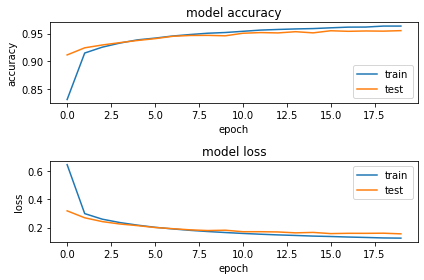

In [194]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "results/"
model_name = 'keras_mnist4.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [195]:
mnist_model = tf.keras.models.load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1559 - accuracy: 0.9552
Test Loss 0.15587903559207916
Test Accuracy 0.9552000164985657


<AxesSubplot:>

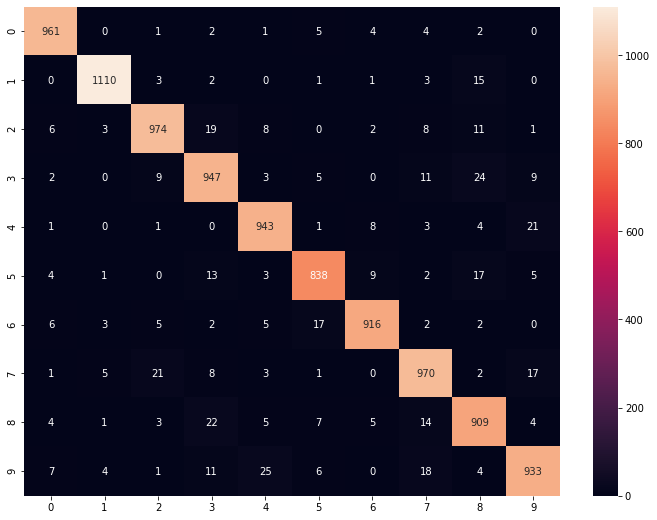

In [168]:
# load the model and create predictions on the test set
mnist_model = tf.keras.models.load_model('results/keras_mnist.h5')
predicted_classes = mnist_model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = predicted_classes)
import seaborn as sns
plt.figure(figsize=(12, 9))

sns.heatmap(cm, annot=True, fmt='d')


9591  classified correctly
409  classified incorrectly


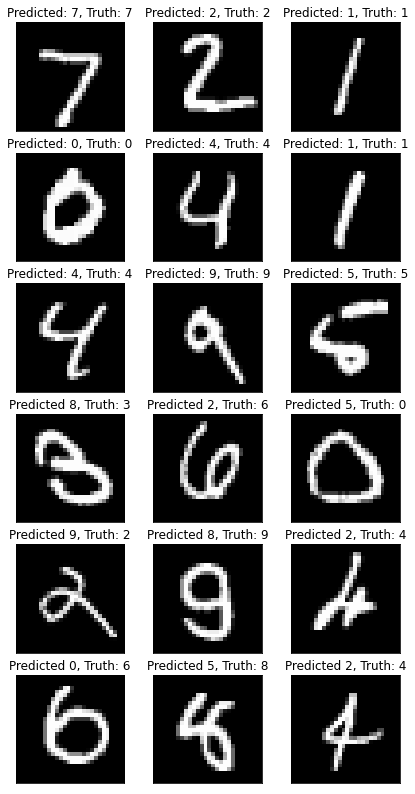

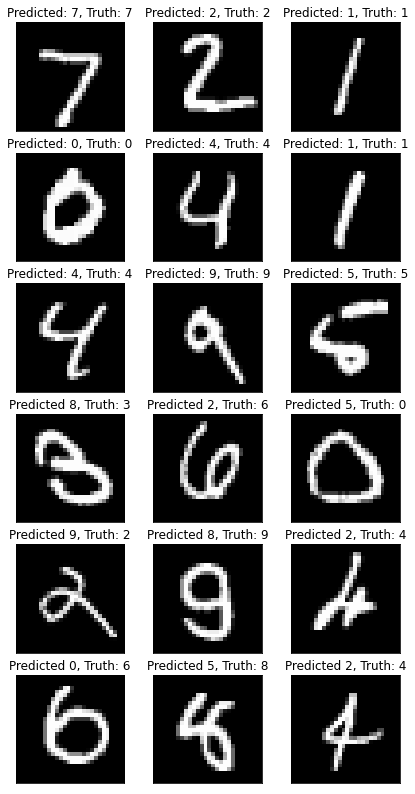

In [123]:


# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [5]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


iris_data = load_iris() 

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) 


encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape=(4,)))
model.add(tf.keras.layers.Activation('relu'))    
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

print('Neural Network Model Summary: ')
print(model.summary())


model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=20)



results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
_________________________________________________________________
activation_8 (A